#### INF2604 – Computational Geometry
### Assignment I - Smallest enclosing circle

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
_EPS = 1**-9

class point(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.mag = self.magnitude()
        
    def dist(self, p):
        return np.sqrt(np.power((p.x - self.x), 2) + np.power((p.y - self.y), 2))
    
    def is_in(self, circle):
        d = self.dist(circle.c)

        if d <= circle.r: # considering p inside circle when p is on circle
            return True
        else:
            return False

    def collinear(self, pi, pj):
        m = np.array([
                        [1, self.x, self.y],
                        [1, pi.x, pi.y],
                        [1, pj.x, pj.y]
                     ])
        m_det = np.linalg.det(m)
        return np.fabs(m_det) <= _EPS
    
    def minus(self, p):
        return point(self.x - p.x, self.y - p.y)
    
    def plus(self, p):
        return point(self.x + p.x, self.y + p.y)
    
    def scalar_mult(self, alpha):
        return point(self.x * alpha, self.y * alpha)
    
    def magnitude(self):
        return np.sqrt(self.x * self.x + self.y * self.y)
    
    def normalization(self):
        m = self.magnitude()
        return point(self.x / m, self.y / m)

### Reading file

In [3]:
points = list()

filename = 'points.txt'

with open(filename, 'r') as f:
    for line in f:
        line = line.split()
        points.append(point(float(line[0]), float(line[1])))

### Heuristic algorithm

Time complexity: $O(n)$

In [4]:
def heuristic(points):
    n = len(points)
    
    if n == 1:
        return points[0], 0.0
    
    p_xmin, p_xmax = min(points, key=lambda p: p.x), max(points, key=lambda p: p.x)
    p_ymin, p_ymax = min(points, key=lambda p: p.y), max(points, key=lambda p: p.y)
    
    
    if p_xmin.dist(p_xmax) > p_ymin.dist(p_ymax):
        pi, pj = p_xmin, p_xmax
    else:
        pi, pj = p_ymin, p_ymax
        
    c = point((pi.x + pj.x) / 2.0, (pi.y + pj.y) / 2.0)
    r = pi.dist(pj) / 2.0
    
    k = 0
    
    for pk in points:
        d = pk.minus(c)
        if d.mag > r:
            d_norm = d.normalization()
            c = c.plus(d_norm.scalar_mult((d.mag - r) / 2.0))
            r = (d.mag + r) / 2.0
            
    return c, r

### Heuristic answer for points.txt

In [5]:
c, r = heuristic(points)
print('c: ({}, {}) r: {}'.format(c.x, c.y, r))

c: (409.95167301564425, 346.5128321593067) r: 200.55763629962556


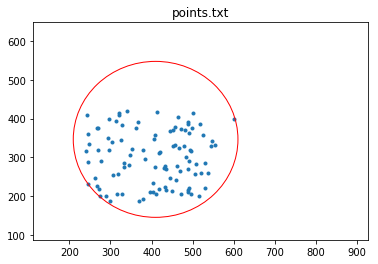

In [6]:
fig, ax = plt.subplots()
ax.scatter([p.x for p in points], [p.y for p in points], marker='.')
circle = plt.Circle((c.x, c.y), r, facecolor='none', edgecolor=(1, 0, 0), linewidth=1)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.add_artist(circle)

plt.xlim(xlim[0] - xlim[0] * 0.5, xlim[1] + xlim[1] * 0.5)
plt.ylim(ylim[0] - ylim[0] * 0.5, ylim[1] + ylim[1] * 0.5)

plt.title(filename)

plt.show()

### Exact algorithm

Time complexity: $O(n)$

In [7]:
class circle(object):
    def __init__(self, p, q):
        self.c = point((p.x + q.x) / 2.0, (p.y + q.y) / 2.0)
        self.r = p.minus(q).magnitude() / 2.0

In [8]:
# given three points, determine if exists obtuse angle
def obtuse(p1, p2, p3):
    points = np.array([[p1.x, p1.y], [p2.x, p2.y], [p3.x, p3.y]])

    A = points[1] - points[0]
    B = points[2] - points[1]
    C = points[0] - points[2]

    angles = []
    
    for e1, e2 in ((A, -B), (B, -C), (C, -A)):
        num = np.dot(e1, e2)
        denom = np.linalg.norm(e1) * np.linalg.norm(e2)
        angles.append(np.arccos(num / denom) * 180 / np.pi)
        
    m_angle = max(angles)
    
    if m_angle > 90.0:
        return True
    else:
        return False

In [9]:
def farthest_pair(p1, p2, p3):
    d = p1.dist(p2)
    pi, pj = p1, p2

    if d < p1.dist(p3):
        d = p1.dist(p3)
        pj = p3
    if d < p2.dist(p3):
        pi, pj = p2, p3
        
    return pi, pj

In [10]:
def circumcenter(p1, p2, p3):
    ax, ay = p1.x, p1.y
    bx, by = p2.x, p2.y
    cx, cy = p3.x, p3.y
    
    d = 2 * (ax * (by - cy) + bx * (cy - ay) + cx * (ay - by))
    ux = ((ax * ax + ay * ay) * (by - cy) + (bx * bx + by * by) * (cy - ay) + (cx * cx + cy * cy) * (ay - by)) / d
    uy = ((ax * ax + ay * ay) * (cx - bx) + (bx * bx + by * by) * (ax - cx) + (cx * cx + cy * cy) * (bx - ax)) / d
    
    return point(ux, uy)

In [11]:
def generate_random_points(n, minx = 0, maxx = 400, miny = 0, maxy = 400):
    points = list()
    
    for i in range(n):
        x, y = np.random.randint(minx, maxx), np.random.randint(miny, maxy)
        points.append(point(x, y))
    
    return points

In [12]:
def random_permutation(points):
    n = len(points)
    for k in range(2, n):
        r = np.random.randint(k)
        points[k], points[r] = points[r], points[k]
    
    return points

In [13]:
def min_circle_with_2_points(points, q1, q2):
    n = len(points)
    C = list([circle(q1, q2)])
    
    for k in range(n):
        pk = points[k]
        if pk.is_in(C[k]):
            C.append(C[k])
        else:
            if pk.collinear(q1, q2): # take farthest pair of points
                pi, pj = farthest_pair(pk, q1, q2)
                C.append(circle(pi, pj))
            else:
                if obtuse(pk, q1, q2):
                    pi, pj = farthest_pair(pk, q1, q2)
                    C.append(circle(pi, pj))
                else:
                    c = circumcenter(pk, q1, q2)
                    c_aux = circle(point(0, 0), point(0, 0))
                    c_aux.c = c
                    c_aux.r = c.minus(pk).mag
                    C.append(c_aux)
    
    return C[-1]

In [14]:
def min_circle_with_point(points, q):
    n = len(points)
    C = list([circle(points[0], q)])
    
    for j in range(1, n):
        pj = points[j]
        if pj.is_in(C[j-1]):
            C.append(C[j-1])
        else:
            C.append(min_circle_with_2_points(points[:j], pj, q))
    
    return C[-1]

In [15]:
def min_circle(points):
    points = random_permutation(points)
    n = len(points)
    C = list([circle(points[0], points[1])])
    for i in range(2, n):
        pi = points[i]
        if pi.is_in(C[i-2]):
            C.append(C[i-2])
        else:
            C.append(min_circle_with_point(points[:i], pi))
    
    return C[-1]

### Exact answer for points.txt

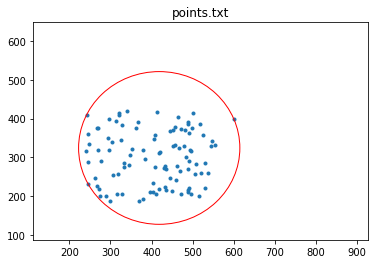

In [16]:
outc = min_circle(points)

fig, ax = plt.subplots()
ax.scatter([p.x for p in points], [p.y for p in points], marker='.')
circle_plt = plt.Circle((outc.c.x, outc.c.y), outc.r, facecolor='none', edgecolor=(1, 0, 0), linewidth=1)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.add_artist(circle_plt)

plt.xlim(xlim[0] - xlim[0] * 0.5, xlim[1] + xlim[1] * 0.5)
plt.ylim(ylim[0] - ylim[0] * 0.5, ylim[1] + ylim[1] * 0.5)

plt.title(filename)

plt.show()

In [17]:
print('center: ({}, {}) - radius: {}'.format(outc.c.x, outc.c.y, outc.r))

center: (418.7487430123981, 324.40499984385247) - radius: 196.38386442932028


### Experiments

The experiments are realized on a machine with the following configuration:

* Sistema: Ubuntu 16.04
* Processador: Intel core i5 7th gen
* RAM: 8gb

For each iteration $i$, are generated $i * 8$ points, in interval of $[-i * 100, i * 100]$. Also, in each iteration, the heuristic algorithm and the exact algorithm are called 8 times, the time presented on experiment is the average spent.

Below is presented a figure with details of $time \times i$

In [18]:
from tqdm import tqdm

def run_experiments(n_iterations=100, display=False):

    time_heuristic = list()
    time_exact = list()
    rep = 8

    for i in tqdm(range(1, n_iterations + 1)):
        maxx = i * 100
        maxy = i * 100

        points = generate_random_points(i * 16, minx=-maxx, maxx=maxx, miny=-maxy, maxy=maxy)
            
            
        avg_h = list()
        avg_e = list()
        
        for j in range(rep):
            start_h = time.time()
            outc = heuristic(points)
            end_h = time.time()

            start_e = time.time()
            outc = min_circle(points)
            end_e = time.time()
            
            avg_h.append(end_h - start_h)
            avg_e.append(end_e - start_e)
            
        if display: # plot exact algorithm solution
            fig, ax = plt.subplots(figsize=(5,5))
            ax.scatter([p.x for p in points], [p.y for p in points], marker='.')
            circle_plt = plt.Circle((outc.c.x, outc.c.y), outc.r, facecolor='none', edgecolor=(1, 0, 0), linewidth=1)
            ax.add_artist(circle_plt)

            plt.xlim(-maxx + (-maxx * 0.5), maxx + (maxx * 0.5))
            plt.ylim(-maxy + (-maxx * 0.5), maxy + (maxx * 0.5))

            plt.show()

        time_heuristic.append(np.sum(avg_h) / rep)
        time_exact.append(np.sum(avg_e) / rep)
        
    return time_heuristic, time_exact

In [19]:
n_iter = 1024
times_h, times_e = run_experiments(n_iterations=n_iter)

100%|██████████| 1024/1024 [1:11:12<00:00,  4.17s/it]


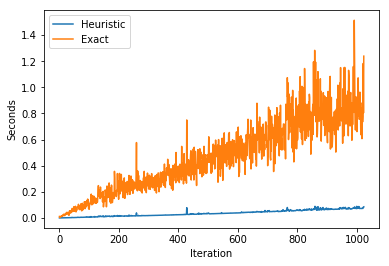

In [20]:
plt.plot(times_h, label='Heuristic')
plt.plot(times_e, label='Exact')
plt.xlabel('Iteration')
plt.ylabel('Seconds')
plt.legend()
plt.show()